In [27]:
import gaussian_mixture_anomaly_detection as ad
import matplotlib
import matplotlib.pyplot as plt
from importlib import reload
import pandas as pd
import numpy as np
import utils
import models
import ewma

reload(ad)
reload(utils)
reload(models)
reload(ewma)
reload(matplotlib)
%matplotlib inline

In [23]:
eff_train = utils.read_ts('data/eff_train/eff_train1.csv')
eff_train = utils.bad_to_mean(eff_train)
eff_train.head()

/Users/alex/Desktop/GlobalChangersSibur/utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[' value'][df[' quality'] != 'Good'] = mean_good


,tag,timestamp,value,quality
0,Efficiency,01.10.2016 0:00,16137.70,Good
1,Efficiency,01.10.2016 0:00,16060.55,Good
2,Efficiency,01.10.2016 0:00,16633.79,Good
3,Efficiency,01.10.2016 0:00,17578.13,Good
4,Efficiency,01.10.2016 0:00,17331.05,Good


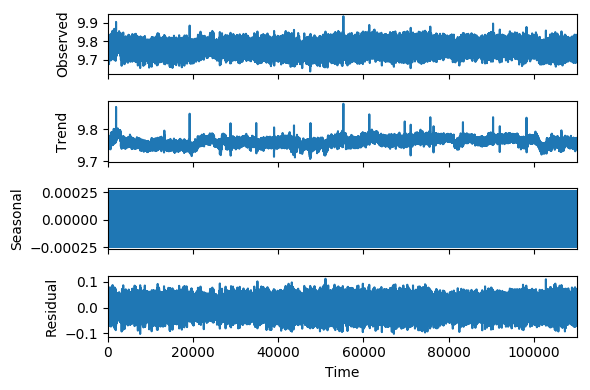

11000


,trend,absdiff,diff
30,9.762740,0.000724,0.000724
31,9.753068,0.002822,-0.002822
32,9.745222,0.001152,0.001152
33,9.754340,0.001027,0.001027


In [25]:
origin_ts = eff_train[' value'][40000:150000].values
lag_to_drop=10
df = utils.get_expanded_features(origin_ts,lag_to_drop=10,plot=True)
dropped_origin = utils.get_dropped(origin_ts, lag=10)
print(len(df))
df.loc[30:33]

100%|██████████| 1/1 [00:11<00:00, 11.46s/it]

Start probabilities memorization



/Users/alex/Desktop/GlobalChangersSibur/gaussian_mixture_anomaly_detection.py:200: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,com=5,adjust=True,min_periods=0).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


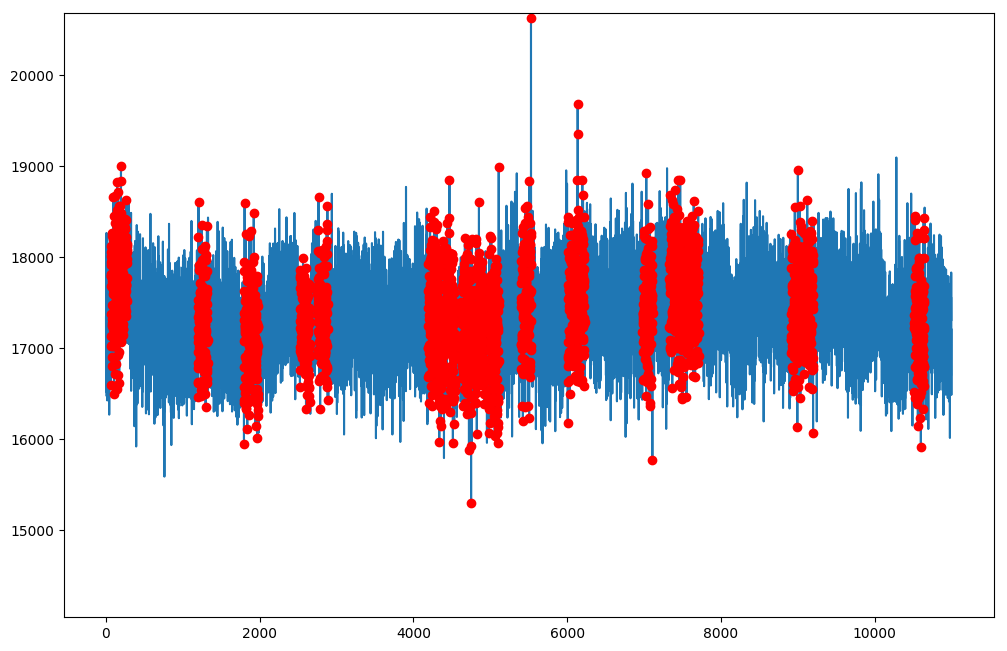

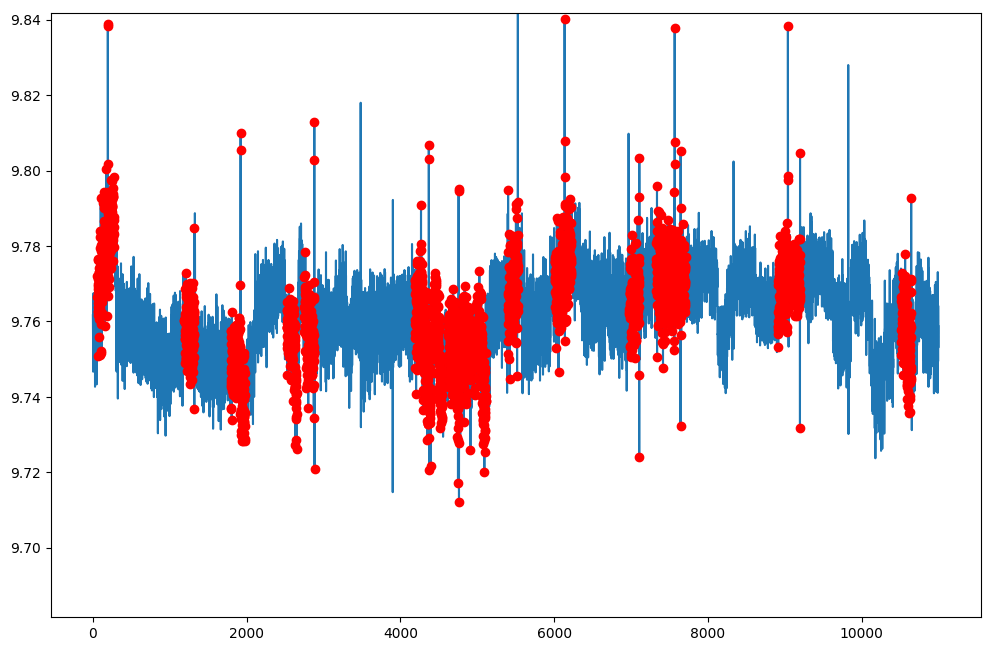

(0.99894010916735554, 0.9128438688908399, 0.59700365736186434, -0.42097505744153962)
CPU times: user 1min 59s, sys: 5.89 s, total: 2min 5s
Wall time: 1min 59s


In [9]:
%%time
# 2 hour predictions
targets = utils.get_targets_with_mixture(df, horizont=2 * 6 * 11, halflife=5,top=0.01, T = None) #24 * 11*6
utils.plot_with_target(dropped_origin, targets)
utils.plot_with_target(df['trend'].values, targets)
sigmas = ewma.moving_dispersion(df['trend'].values, window=10)
print(models.train_test_run(df[['trend','absdiff']], sigmas, targets))

Reading data from "data/energy_cons_train/Energy_cons_train1.csv"...
TSA decomposition...
lag_to_drop 20
Start probabilities memorization

/Users/alex/Desktop/GlobalChangersSibur/utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[' value'][df[' quality'] != 'Good'] = mean_good
100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


/Users/alex/Desktop/GlobalChangersSibur/gaussian_mixture_anomaly_detection.py:200: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,com=10,adjust=True,min_periods=0).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


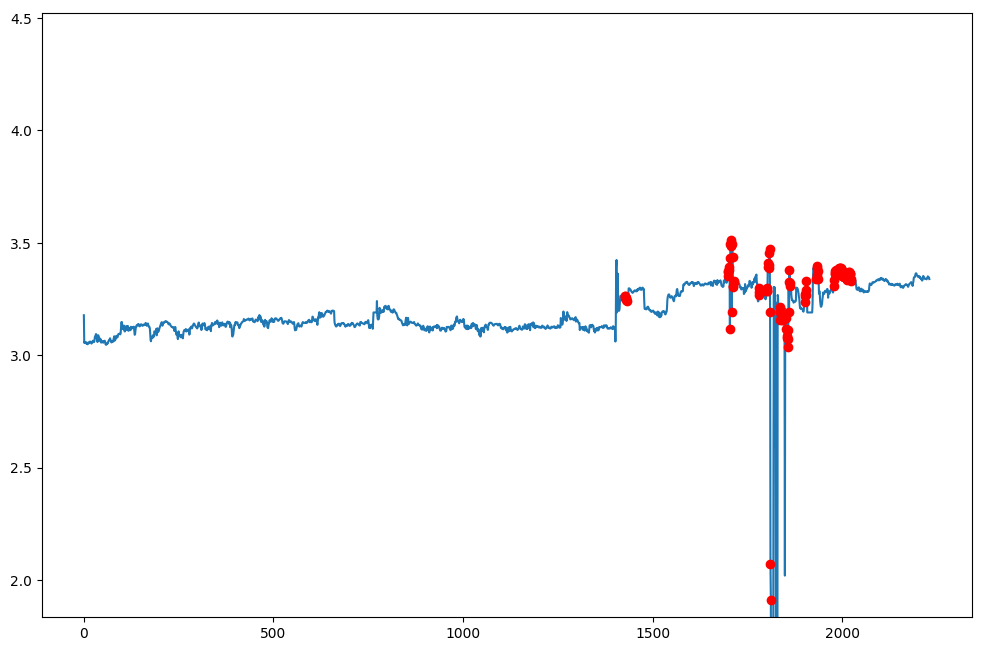

(1.0, 0.63539983067805739, 0.0070518459764916663, -0.054326074211654918)
CPU times: user 17.3 s, sys: 199 ms, total: 17.5 s
Wall time: 17.5 s


In [31]:
%%time 
score = utils.end_to_end('data/energy_cons_train/Energy_cons_train1.csv',
                         plot=True,
                         lag_to_drop=20,
                         horizont=2 * 60,
                         halflife = 10,
                         X_length=40,
                         top=0.03)
print(score)

Reading data from "data/qual_train/qual_train1.csv"...
TSA decomposition...
lag_to_drop 1
Start probabilities memorization

/Users/alex/Desktop/GlobalChangersSibur/utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[' value'][df[' quality'] != 'Good'] = mean_good
100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


/Users/alex/Desktop/GlobalChangersSibur/gaussian_mixture_anomaly_detection.py:200: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,com=1,adjust=True,min_periods=0).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


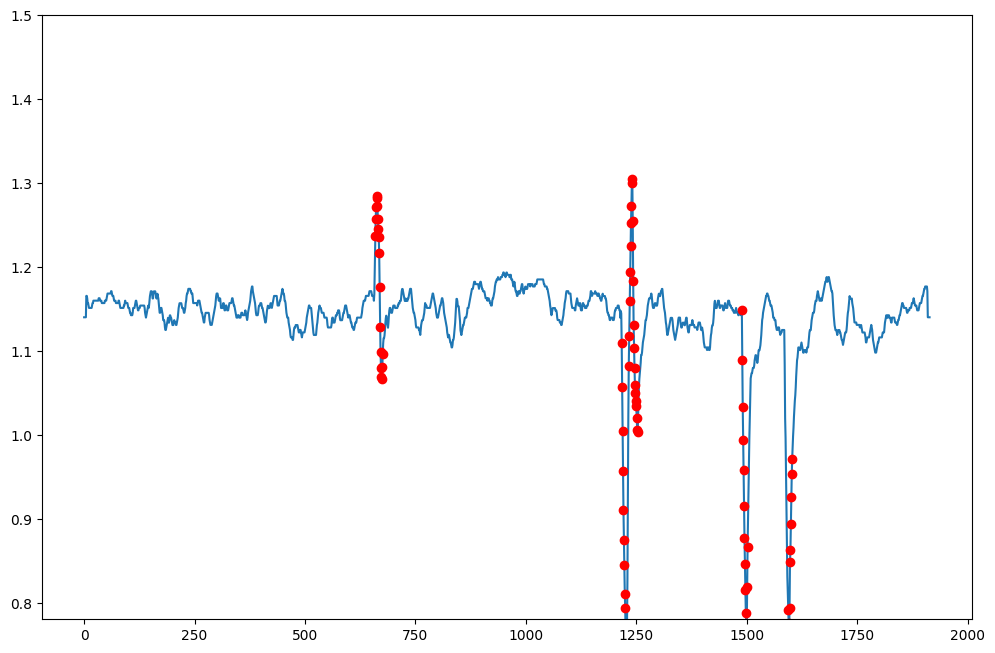

(0.75374143847807817, 0.92807211184694627, 0.39510205455917868, -0.40081883436261889)
CPU times: user 15.7 s, sys: 167 ms, total: 15.8 s
Wall time: 16 s


In [32]:
%%time 
score = utils.end_to_end('data/qual_train/qual_train1.csv',
                         plot=True,
                         lag_to_drop=1,
                         horizont=10,
                         halflife = 1,
                         X_length=10,
                         top=0.01)
print(score)

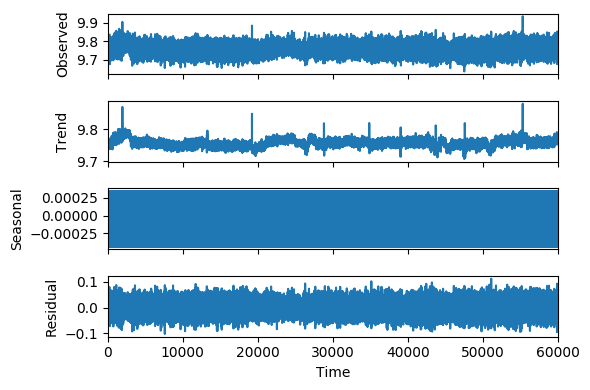

100%|██████████| 1/1 [00:05<00:00,  5.24s/it]

Start probabilities memorization



/Users/alex/Desktop/GlobalChangersSibur/gaussian_mixture_anomaly_detection.py:200: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,com=5,adjust=True,min_periods=0).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


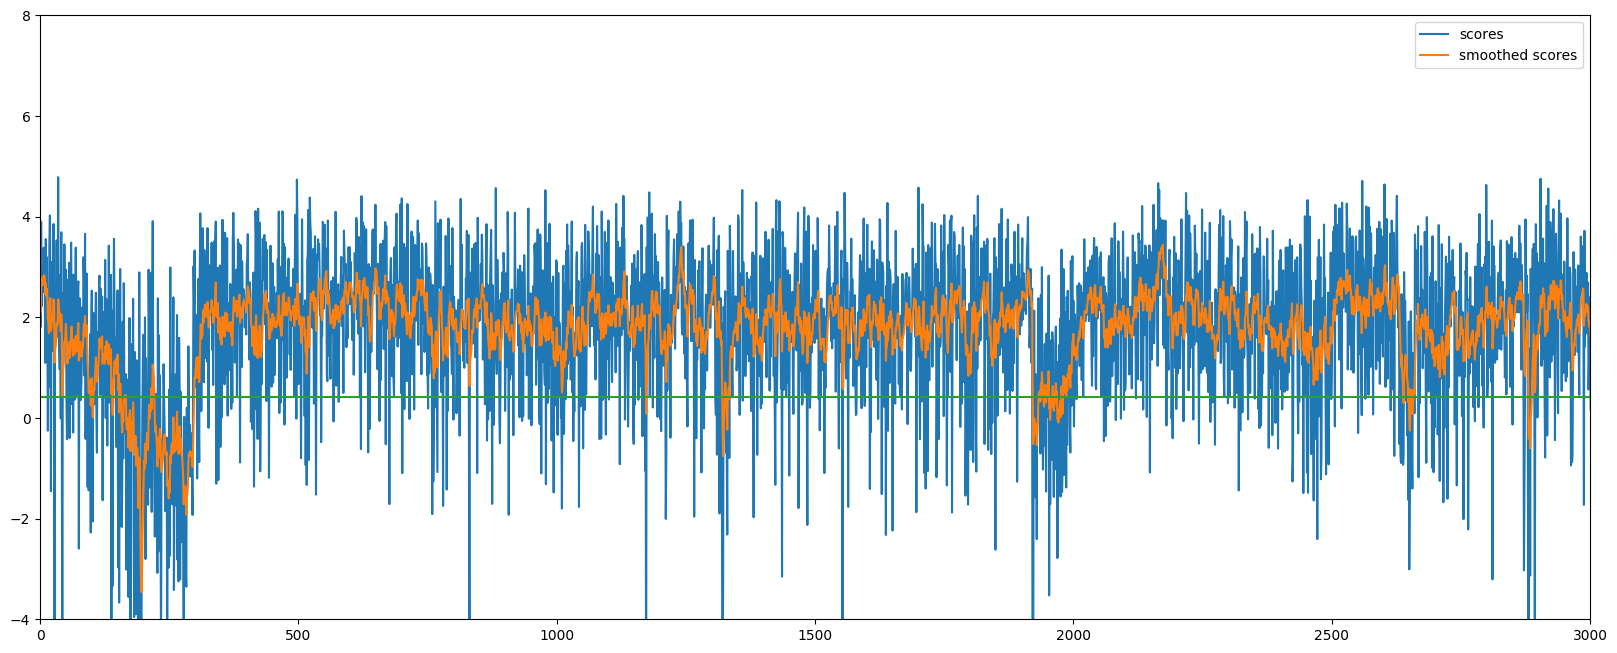

In [34]:
import gaussian_mixture_anomaly_detection as gad
origin_ts = eff_train[' value'][40000:100000].values
lag_to_drop=10
df = utils.get_expanded_features(origin_ts,lag_to_drop=10,plot=True)
targets, scores, smoothed_scores, treshold = gad.extract_anomaly_target(df, 
                                            frame_period=df.shape[0],
                                            halflife=5,
                                            horizont=6 * 11, top=0.05, more_info=True)

L = len(scores.reshape(-1))
plt.figure(figsize=(20,8))
plt.plot(np.arange(L), scores.reshape(-1), '-', label='scores', alpha=1)
plt.plot(np.arange(L), smoothed_scores.reshape(-1), '-', label='smoothed scores')
plt.plot([0, 5000], [treshold, treshold])
plt.xlim([0,3000])
plt.ylim([-4,8])
plt.legend()
plt.show()